In [277]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [278]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_path = '/content/train.csv'
test_path = '/content/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [280]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


전처리 계획

1. ID: drop
2. 매물확인방식: 레이블 ->
3. 보증금
4. 월세
5. 전용면적
6. 해당층
7. 총층
8. 방향: 레이블 ->
9. 방수
10. 욕실수
11. 주차가능여부: 레이블
12. 총주차대수 -> 없고 있고 차이가 큼 -> 영향을 많이 줄 수도? => 이거 어케 할지
13. 관리비: 그대로
14. 중개사무소: 레이블 -> 유의미
15. 제공플랫폼 -> 없는게 나음
16. 게시일 => 이거 합쳐보기












In [281]:
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


열별 결측치 개수

In [282]:
column_nulls = train.isnull().sum()
print("\n각 열별 null 값 개수:")
column_nulls


각 열별 null 값 개수:


,0
ID,0
매물확인방식,0
보증금,0
월세,0
전용면적,787
해당층,229
총층,16
방향,0
방수,16
욕실수,18


In [283]:
df_cleaned = train.dropna(subset=['총층', '방수', '욕실수'])

In [284]:
train.shape

(2452, 17)

In [285]:
train.head(15)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1
5,TRAIN_0005,전화확인,153000000.0,530000,29.50,NaN,3.0,남향,2.0,1.0,가능,1.0,0,Q42YF3Y0I2,A플랫폼,2024-09-12,0
6,TRAIN_0006,현장확인,348500000.0,400000,NaN,2.0,3.0,북동향,1.0,1.0,불가능,NaN,0,A72Mx9C8U2,D플랫폼,2024-08-23,0
7,TRAIN_0007,현장확인,139500000.0,590000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,d22DX4Y4P8,B플랫폼,2025-03-03,0
8,TRAIN_0008,현장확인,120500000.0,440000,31.55,1.0,2.0,북향,2.0,2.0,가능,18.0,3,G52Iz8V2B9,B플랫폼,2024-05-23,0
9,TRAIN_0009,현장확인,79500000.0,260000,39.66,2.0,3.0,남동향,2.0,1.0,불가능,2.0,0,M90Ph8W9V3,B플랫폼,2024-11-30,0


In [286]:
train.head(15)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.30,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1
5,TRAIN_0005,전화확인,153000000.0,530000,29.50,NaN,3.0,남향,2.0,1.0,가능,1.0,0,Q42YF3Y0I2,A플랫폼,2024-09-12,0
6,TRAIN_0006,현장확인,348500000.0,400000,NaN,2.0,3.0,북동향,1.0,1.0,불가능,NaN,0,A72Mx9C8U2,D플랫폼,2024-08-23,0
7,TRAIN_0007,현장확인,139500000.0,590000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,d22DX4Y4P8,B플랫폼,2025-03-03,0
8,TRAIN_0008,현장확인,120500000.0,440000,31.55,1.0,2.0,북향,2.0,2.0,가능,18.0,3,G52Iz8V2B9,B플랫폼,2024-05-23,0
9,TRAIN_0009,현장확인,79500000.0,260000,39.66,2.0,3.0,남동향,2.0,1.0,불가능,2.0,0,M90Ph8W9V3,B플랫폼,2024-11-30,0


허위매물 개수

In [287]:
count_1 = (train['허위매물여부'] == 0).sum()
count_1

2154

In [288]:
count_2 = (train['허위매물여부'] == 1).sum()
count_2

298

In [289]:
train.describe()

# 월세가 0원?

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


In [290]:
#월세가 0원인 건 다 허위 매물임

zero_rent_rows = train[train['월세'] == 0]
zero_rent_rows

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
188,TRAIN_0188,현장확인,5000000.0,0,NaN,4.0,4.0,동향,1.0,1.0,불가능,1.0,9,Z18up3D1C3,A플랫폼,2024-08-27,1
725,TRAIN_0725,서류확인,364000000.0,0,17.50,10.0,16.0,북동향,1.0,1.0,가능,34.0,0,R17wi5N4M8,D플랫폼,2024-05-19,1
809,TRAIN_0809,현장확인,108500000.0,0,18.87,NaN,16.0,동향,1.0,1.0,가능,54.0,0,G38pb6B9C7,C플랫폼,2024-07-16,1
1305,TRAIN_1305,현장확인,18000000.0,0,17.50,NaN,17.0,남동향,1.0,1.0,가능,99.0,0,y86qM5T6T6,A플랫폼,2024-05-16,1


In [291]:
#관리비가 0원인 건 모름

zero_guan_rows = train[train['관리비'] == 0]
zero_guan_rows

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1
5,TRAIN_0005,전화확인,153000000.0,530000,29.50,NaN,3.0,남향,2.0,1.0,가능,1.0,0,Q42YF3Y0I2,A플랫폼,2024-09-12,0
6,TRAIN_0006,현장확인,348500000.0,400000,NaN,2.0,3.0,북동향,1.0,1.0,불가능,NaN,0,A72Mx9C8U2,D플랫폼,2024-08-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,TRAIN_2433,현장확인,96500000.0,310000,17.50,3.0,10.0,남동향,2.0,2.0,가능,48.0,0,G52Iz8V2B9,K플랫폼,2025-01-15,0
2437,TRAIN_2437,현장확인,151500000.0,650000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,L27JO3N6S2,C플랫폼,2024-12-15,0
2443,TRAIN_2443,현장확인,16500000.0,370000,NaN,4.0,9.0,남향,1.0,1.0,불가능,6.0,0,S06Ox3K4D9,A플랫폼,2024-11-13,0
2444,TRAIN_2444,현장확인,31000000.0,370000,17.50,2.0,7.0,남서향,1.0,1.0,가능,50.0,0,G52Iz8V2B9,A플랫폼,2024-08-27,0


In [292]:
zero_count = (train['관리비'] == 0).sum()

print(f"관리비가 0인 행의 개수: {zero_count}")

관리비가 0인 행의 개수: 759


In [293]:
correlation = train['관리비'].corr(train['월세'])

print(f"관리비와 월세 간의 상관계수: {correlation:.2f}")

관리비와 월세 간의 상관계수: -0.07


Text(0, 0.5, '월세 (원)')

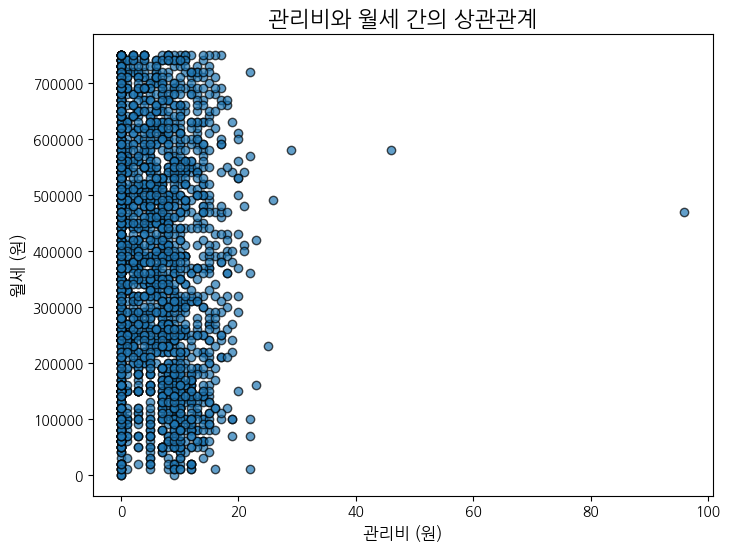

In [294]:
# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(train['관리비'], train['월세'], alpha=0.7, edgecolors='k', label='데이터 점')

# 제목 및 레이블 설정
plt.title('관리비와 월세 간의 상관관계', fontsize=16)
plt.xlabel('관리비 (원)', fontsize=12)
plt.ylabel('월세 (원)', fontsize=12)

In [295]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

전처리

In [296]:
def preprocess_data(df, is_train=True):

    df = df.copy()

    # 날짜 데이터 처리 ('게재일' 분리)
    if '게재일' in df.columns:
        df['게재일_년'] = pd.to_datetime(df['게재일']).dt.year
        df['게재일_월'] = pd.to_datetime(df['게재일']).dt.month
        df['게재일_일'] = pd.to_datetime(df['게재일']).dt.day
        df.drop(columns=['게재일'], inplace=True)

    # 열 제거
    cols_to_drop = ['ID', 'index', '제공플랫폼'] #제공플랫폼 오히려 더 떨어짐
    for col in cols_to_drop:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)


    #보증금, 월세에 따른 전용면접 결측값 채우기 -> 조금 오르긴함
    df['보증금_월세_가중합'] = df['보증금'] + df['월세'] * 100 # 곱하기 100 했을 때가 가장 높았음(제출 기준)

    ratio_mean = df.loc[df['전용면적'].notnull(), '전용면적'].mean() / df.loc[df['전용면적'].notnull(), '보증금_월세_가중합'].mean()

    def fill_area(row):
        if np.isnan(row['전용면적']):
            return row['보증금_월세_가중합'] * ratio_mean
        return row['전용면적']

    df['전용면적'] = df.apply(fill_area, axis=1)

    df.drop(columns=['보증금_월세_가중합'], inplace=True)

    #총층, 방수, 욕실수 열들중 결측값 dropna
    df_cleaned = df.dropna(subset=['총층', '방수', '욕실수'])

    #총주차대수 열 없애기 -> 없애면 실제 제출물에서 2퍼센트 떨어짐
    #df.drop(columns=['총주차대수'], inplace=True)


    #총주차대수 결측값을 총층과의 비율로 채우기 -> 어떻게 할지



    # 중간값으로 대체 -> 평균값보다 중간값이 성능이 더 좋았음
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)

    # Label Encoding for '주차가능여부' and '중개사무소'
    label_cols = ['매물확인방식', '방향', '주차가능여부', '중개사무소']
    for col in label_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

    return df

In [297]:
# Train 데이터 전처리
train_preprocessed = preprocess_data(train, is_train=True)

# Test 데이터 전처리
test_preprocessed = preprocess_data(test, is_train=False)

# Train과 Test의 열 정렬
missing_cols = set(train_preprocessed.columns) - set(test_preprocessed.columns)
for col in missing_cols:
    test_preprocessed[col] = 0

test_preprocessed = test_preprocessed[train_preprocessed.columns.drop('허위매물여부')]

<ipython-input-296-ffb2800ad362>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-296-ffb2800ad362>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [298]:
train_preprocessed.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,허위매물여부,게재일_년,게재일_월,게재일_일
0,2,402500000.0,470000,67.328832,4.0,15.0,7,1.0,1.0,0,40.0,96,240,0,2024,10,9
1,2,170500000.0,200000,28.522160,3.0,4.0,0,2.0,1.0,1,10.0,0,228,0,2024,12,26
2,1,114000000.0,380000,19.477742,2.0,3.0,3,1.0,1.0,1,10.0,0,150,0,2024,11,28
3,2,163500000.0,30000,36.300000,3.0,9.0,0,2.0,1.0,0,13.0,10,31,0,2024,11,26
4,2,346000000.0,530000,58.085999,3.0,3.0,3,2.0,1.0,1,10.0,0,72,1,2024,6,25


In [299]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

X = train_preprocessed.drop(columns=['허위매물여부'])
y = train_preprocessed['허위매물여부']

# test_size 0.2, 0,3, 0.4, 0.5 중 0.4가 제일 나음 0.4로 했을 때 많이 오름
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

model = XGBClassifier(eval_metric='logloss')#,n_estimators=500, learning_rate=0.05, random_state=156
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

macro_f1 = f1_score(y_val, y_pred, average='macro')
print("\nMacro F1 Score:", macro_f1)


Macro F1 Score: 0.9092259560197169


In [300]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score
# from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
# import numpy as np

# # 데이터 분리
# X = train_preprocessed.drop(columns=['허위매물여부'])
# y = train_preprocessed['허위매물여부']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # HyperOpt 최적화 함수 정의
# def objective(params):
#     model = XGBClassifier(
#         n_estimators=int(params['n_estimators']),
#         max_depth=int(params['max_depth']),
#         learning_rate=params['learning_rate'],
#         subsample=params['subsample'],
#         colsample_bytree=params['colsample_bytree'],
#         eval_metric='logloss',
#         use_label_encoder=False
#     )
#     try:
#         # Cross-validation을 통해 성능 평가
#         scores = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=3)
#         return {'loss': -np.mean(scores), 'status': STATUS_OK}
#     except AttributeError as e:
#         return {'loss': np.inf, 'status': STATUS_OK, 'error': str(e)}

# # 하이퍼파라미터 검색 공간 정의
# space = {
#     'n_estimators': hp.quniform('n_estimators', 50, 500, 50),
#     'max_depth': hp.quniform('max_depth', 3, 15, 1),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
# }

# # 최적화 실행
# trials = Trials()
# best_params = fmin(
#     fn=objective,
#     space=space,
#     algo=tpe.suggest,
#     max_evals=50,  # 반복 횟수
#     trials=trials
# )

# # 최적 파라미터 출력
# print("Best Parameters:", best_params)

# # 최적 하이퍼파라미터로 모델 학습
# optimized_model = XGBClassifier(
#     n_estimators=int(best_params['n_estimators']),
#     max_depth=int(best_params['max_depth']),
#     learning_rate=best_params['learning_rate'],
#     subsample=best_params['subsample'],
#     colsample_bytree=best_params['colsample_bytree'],
#     eval_metric='logloss',
#     use_label_encoder=False
# )
# optimized_model.fit(X_train, y_train)

# # 검증 데이터로 평가
# y_pred_optimized = optimized_model.predict(X_val)
# macro_f1_optimized = f1_score(y_val, y_pred_optimized, average='macro')
# print("\nOptimized Macro F1 Score:", macro_f1_optimized)


In [301]:
test_preprocessed.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,게재일_년,게재일_월,게재일_일
0,0,223000000.0,530000,43.354963,5.0,5.0,2,1.0,1.0,1,11.5,7,105,2024,10,21
1,0,150500000.0,590000,30.260000,7.0,11.0,7,1.0,1.0,1,16.0,11,19,2023,9,2
2,2,47000000.0,200000,41.500000,2.0,3.0,1,2.0,1.0,1,11.5,0,52,2024,4,3
3,0,133000000.0,250000,31.350000,5.0,6.0,2,2.0,1.0,0,11.5,5,8,2024,9,19
4,2,108000000.0,380000,23.140000,2.0,3.0,2,1.0,1.0,1,11.5,0,102,2024,11,10


In [302]:
test.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03
3,TEST_003,서류확인,133000000.0,250000,31.35,5.0,6.0,남향,2.0,1.0,가능,NaN,5,C41wx1K6U9,B플랫폼,2024-09-19
4,TEST_004,현장확인,108000000.0,380000,23.14,2.0,3.0,남향,1.0,1.0,불가능,NaN,0,Z68ZJ6F6L4,A플랫폼,2024-11-10


In [303]:
# 테스트 데이터 예측
test_predictions = model.predict(test_preprocessed)

# 결과 저장
output = pd.DataFrame({'ID': test.iloc[:, 0], '허위매물여부': test_predictions})
output.to_csv('submission.csv', index=False)
print("submission.csv 파일이 생성되었습니다.")

submission.csv 파일이 생성되었습니다.


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

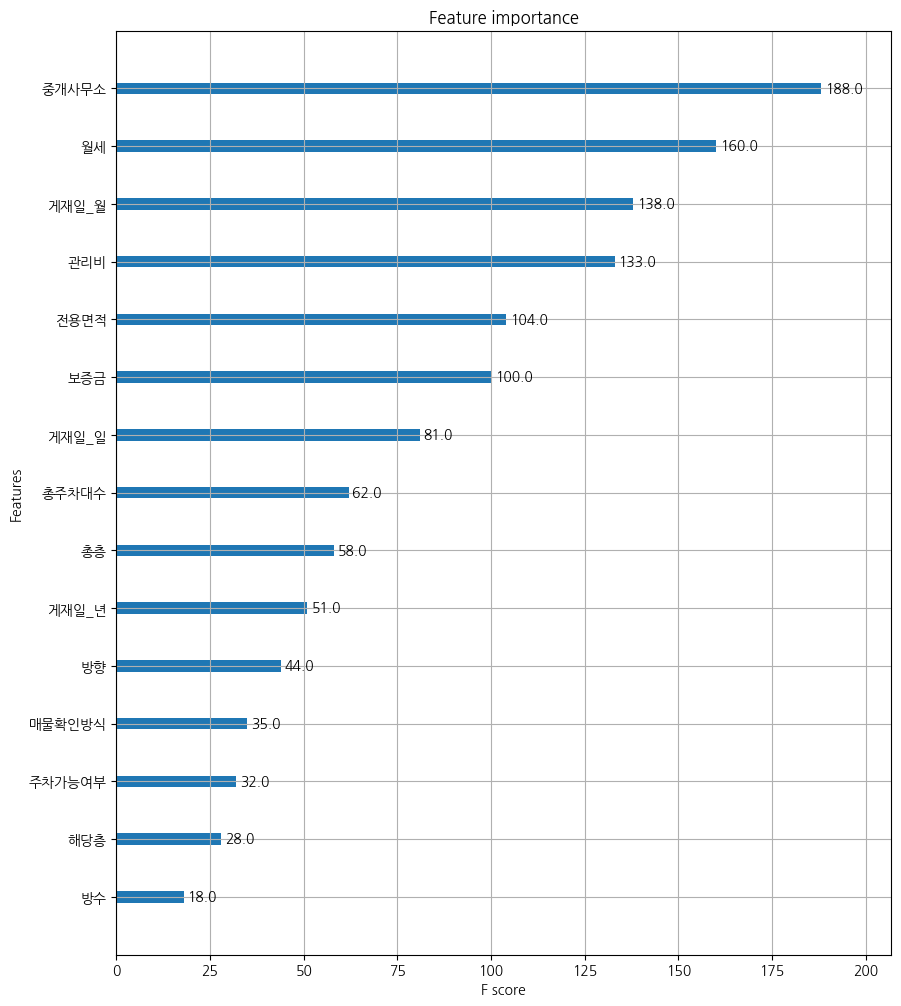

In [304]:
fig, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(model, ax=ax)

In [305]:
# # train 데이터에서 X_train, Y_train 생성
# X_train = train_preprocessed.drop(columns=['허위매물여부'])
# y_train = train_preprocessed['허위매물여부']

# # 데이터 확인
# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)

In [306]:
# from sklearn.model_selection import train_test_split

# X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [307]:
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score

# xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# xgb_clf.fit(X_tr, Y_tr, early_stopping_rounds=50, eval_metric='auc', eval_set=[(X_tr, Y_tr), (X_val, Y_val)])

# xgb_roc_score = roc_auc_score(Y_test, xgb_clf.predict_proba(X_test)[:, 1])
# print('ROC AUC: {0:.4f}'.format(xgb_roc_score))